# <center>Модели машинного обучения в production
Важно задать себе следующие вопросы:
* Какими будут основные потребители результатов? Это будут другие сервисы? Или модель будет встроена в мобильное приложение?
* Как и в каком виде потребители ожидают получать результаты? По времени или по запросу? Если по запросу, то по каким правилам они будут его осуществлять?
* Какая для этого существует (или планируется) инфраструктура?

Существует множество методологий для управления Data Science-проектами. Наиболее распространённой методологией разработки является знакомая нам модель *Cross-Industry Standard Process for Data Mining*, или *CRISP-DM*. 

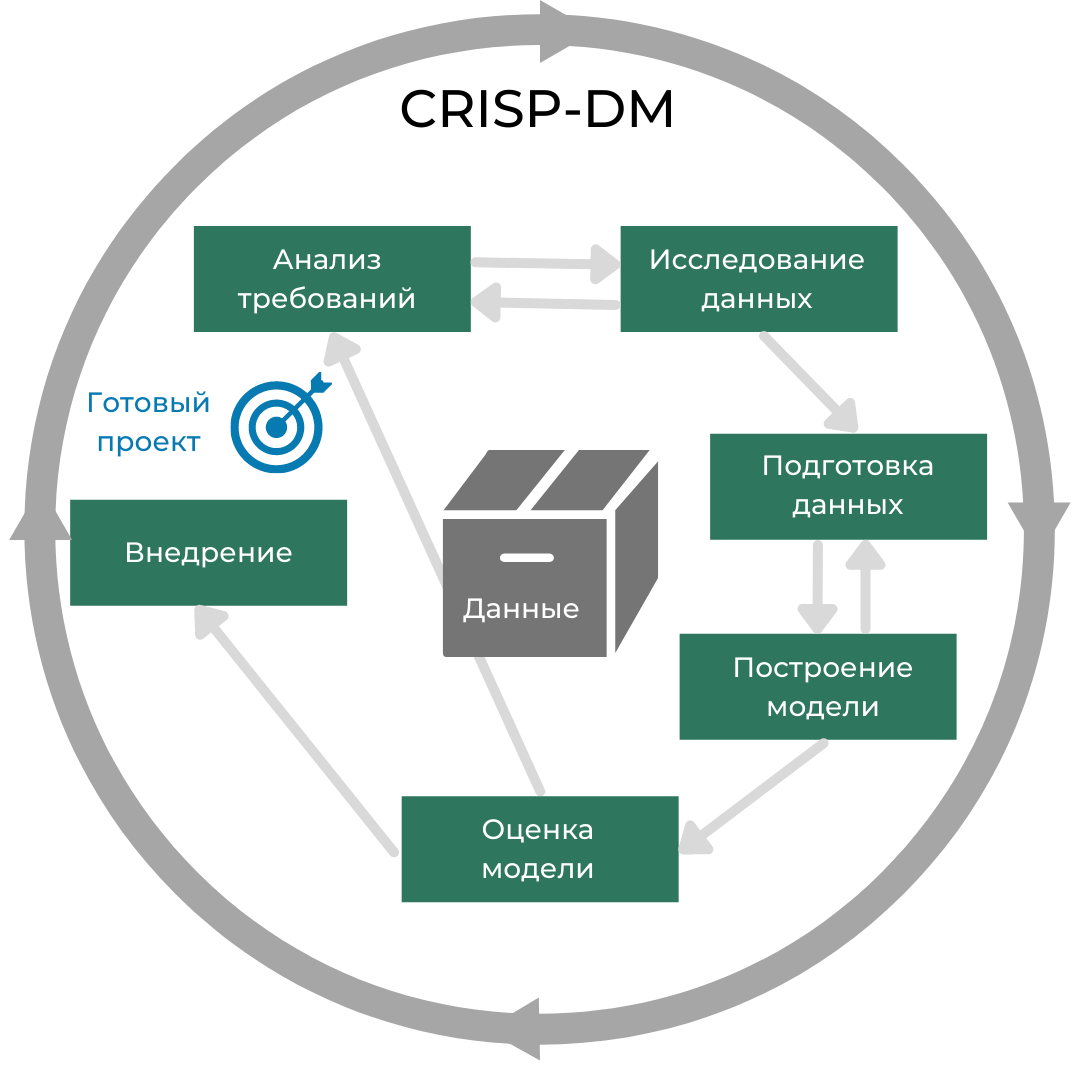

На **этапе внедрения** мы должны понять, будет ли происходить деградация модели во времени в связи с изменением распределений входных данных и возможно ли автоматизировать оценку качества, обновление моделей и их деплой.

# <center>Деплой модели
>Задача развёртывания приложения на сервере называется **деплой** (от англ. *deployment* — внедрение, развёртывание). По сути, это процесс трансформации исходного кода вашего приложения в рабочее состояние на конкретном сервере.

Для того чтобы внедрить модель в продакшн (в минимальном варианте), необходимо:
* Сохранить обученную модель в файл.
* Поднять сервер.
* Доставить и запустить на нём свою модель.

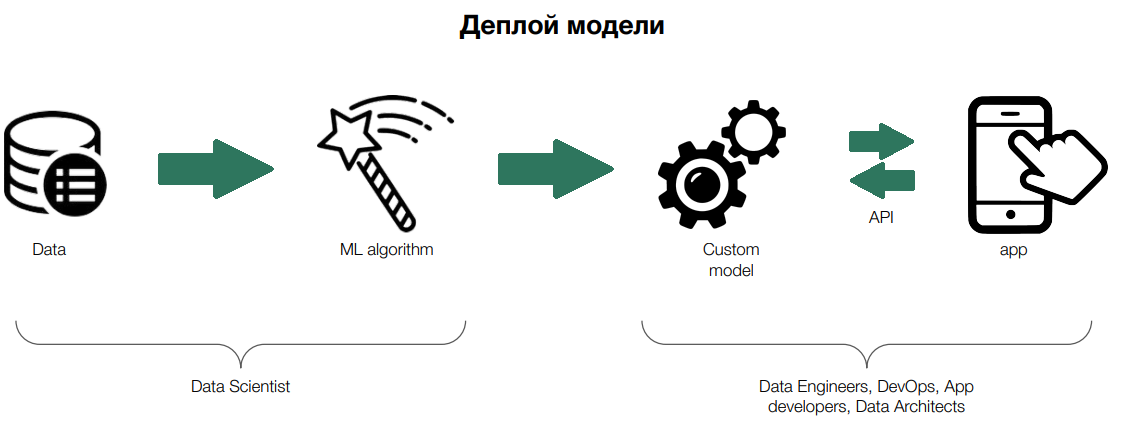

Опыт подсказывает, что если модель создаётся «в вакууме», то в итоге её просто нельзя будет вывести в продакшн.

Дополнительной проблемой является то, что большинство библиотек для машинного обучения сфокусированы именно на **обучении**, а не на **предсказании**.



# <center>Сохранение и загрузка моделей: pickle и joblib
Код, который был написан для обучения модели и оценки её качества, крайне редко используется для инференса (от англ inference — вывод). Так называется непрерывная работа алгоритма машинного обучения в конечном приложении. По этой причине при внедрении моделей в продакшн их принято сохранять в готовом виде, то есть уже обученными и готовыми решать реальные задачи.

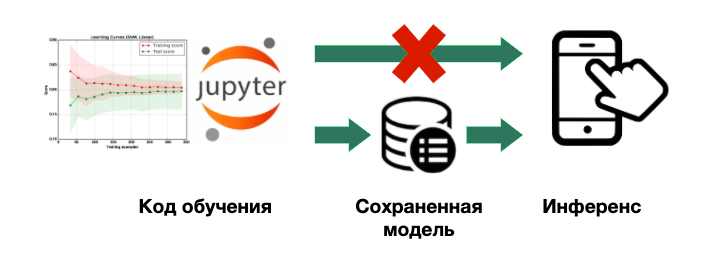

# <center>Сериализация и десериализация
Как и почти всё в языке программирования *Python*, обученная модель является объектом. Этот объект не простой, поскольку модель содержит сложную иерархию классов — в каждом классе есть набор полей, ссылающихся на объекты других классов, и так далее.

Например, объект класса *RandomForestClassifier* из библиотеки *sklearn* содержит множество полей, часть из которых устанавливается во время инициализации модели (максимальная глубина, количество деревьев в ансамбле, критерий информативности и т. д.), а часть определяется во время обучения модели (последовательность предикатов внутри каждого дерева в ансамбле, значимость признаков). Наша задача — «законсервировать» этот объект (модель), сохранив значение всех полей, которые мы задали при инициализации объекта и получили по итогам обучения. То есть мы должны сохранить модель, включая её внешние и внутренние параметры.

Чтобы гарантировать сохранение всей структуры данных и получить её при загрузке обратно, используется сериализация.

>**Сериализация** — это процесс трансформации любой структуры данных, поддерживаемой в языке, в последовательность битов (или байтов). Обратной операцией является **десериализации**.

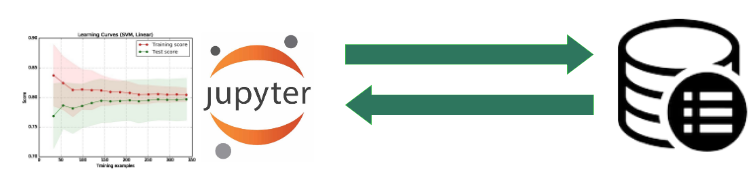

То, в каком виде данные записаны на диск, зачастую может сильно отличаться от того, в каком виде они существуют в памяти программы. И там, и там это будут байты информации, но в файле будет представлена просто их последовательность, а в памяти программы это может быть какой-то объект или даже несколько объектов со структурой.

